# Imports

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("train.csv")

# Problem 1: Analysis of numeric variables

In [47]:
problem1_df = df[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']]
Q1 = problem1_df.quantile(0.25)
Q3 = problem1_df.quantile(0.75)
IQR = Q3 - Q1
((problem1_df < (Q1 - 1.5 * IQR)) | (problem1_df > (Q3 + 1.5 * IQR))).sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
dtype: int64

LotArea has a total of 69 outliers, which is the maximum number of outliers as per box-plot, as compared to the rest of the numeric variables.

In [26]:
problem1_df.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

In [92]:
problem1_df.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137
std,9981.264932,525.480383,438.705324,213.804841
min,1300.000000,334.000000,0.000000,0.000000
25%,7553.500000,1129.500000,795.750000,334.500000
50%,9478.500000,1464.000000,991.500000,480.000000
75%,11601.500000,1776.750000,1298.250000,576.000000
max,215245.000000,5642.000000,6110.000000,1418.000000


LotArea is the most skewed (12.2) from a regular normal distribution, as shown above. The skew is positive. This is further shown in the mean and median values above for LotArea, whereby the mean is larger than the median.

In [94]:
problem1_df = df[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']]
problem1_df.corr()['SalePrice']

LotArea        0.263843
GrLivArea      0.708624
TotalBsmtSF    0.613581
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

GrLivArea (0.709) and GarageArea (0.623) should be used as they have the highest correlation with SalePrice.

# Problem 2 : Analysis of Categorical Variables

In [28]:
problem2_df = df[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']]

In [33]:
problem2_df.nunique()

MSSubClass      15
Neighborhood    25
BldgType         5
OverallQual     10
dtype: int64

In [91]:
for col in problem2_df:
  print(col, problem2_df[col].value_counts().max(), problem2_df[col].value_counts().idxmax())

MSSubClass 536 20
Neighborhood 225 NAmes
BldgType 1220 1Fam
OverallQual 397 5
SalePrice 20 140000


Neighborhood has the highest number of levels (25). 1Fam (BldgType) has the highest number of houses. (1220)

In [84]:
problem2_df = df[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual', 'SalePrice']]

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

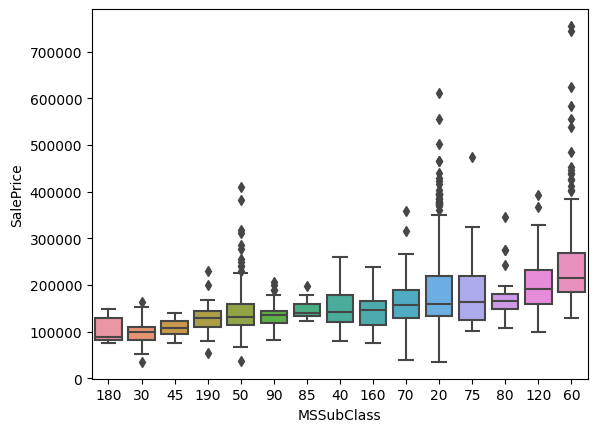

In [85]:
mssubclass_order = problem2_df.groupby(['MSSubClass'])['SalePrice'].median().sort_values().index
sns.boxplot(problem2_df, x='MSSubClass', y='SalePrice', order=mssubclass_order)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

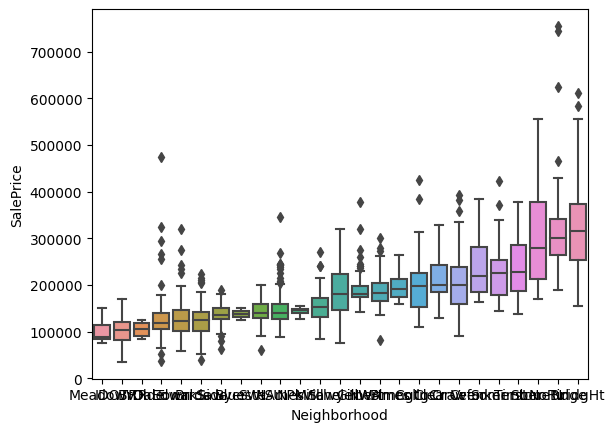

In [86]:
neighborhood_order = problem2_df.groupby(['Neighborhood'])['SalePrice'].median().sort_values().index
sns.boxplot(problem2_df, x='Neighborhood', y='SalePrice', order=neighborhood_order)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

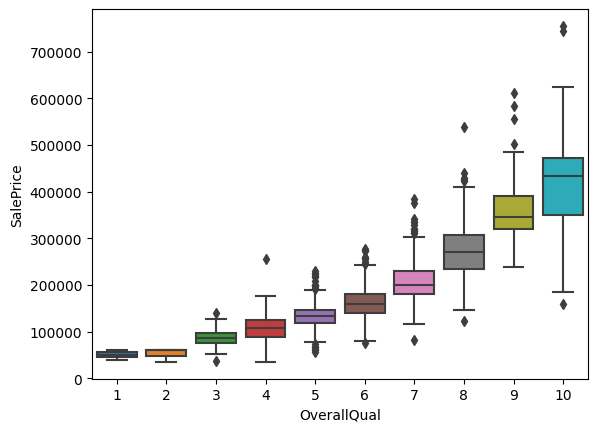

In [87]:
overallqual_order = problem2_df.groupby(['OverallQual'])['SalePrice'].median().sort_values().index
sns.boxplot(problem2_df, x='OverallQual', y='SalePrice', order=overallqual_order)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

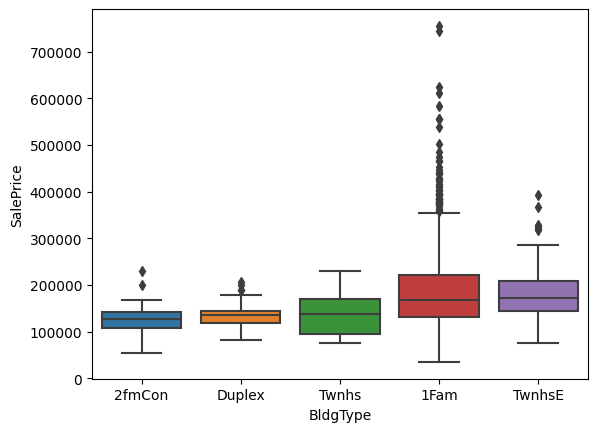

In [88]:
bldgtype_order = problem2_df.groupby(['BldgType'])['SalePrice'].median().sort_values().index
sns.boxplot(problem2_df, x='BldgType', y='SalePrice', order=bldgtype_order)

The top 2 variables are Neighborhood and OverallQual. The different categorical levels of Neighborhood and OverallQual influence the IQRs the most, as compared to BldgType and MSSubClass, which indicates a greater correlation between the Neighborhood and OverallQual levels with the SalePrice. The range of IQRs for the different categories of Neighborhood and OverallQual boxplot are the highest.

# Problem 3 : Interesting Questions for EDA

In [89]:
problem3_df = df[['SalePrice', 'GarageType']]

In [90]:
problem3_df['HasGarage'] = problem3_df['GarageType'].notna()

/var/folders/4s/r_bvbp111_jd36z2wncv0gk40000gn/T/ipykernel_13901/2184048216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  problem3_df['HasGarage'] = problem3_df['GarageType'].notna()


<AxesSubplot:xlabel='HasGarage', ylabel='SalePrice'>

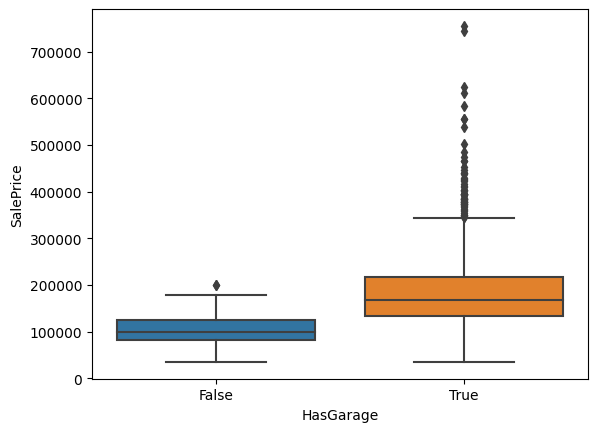

In [41]:
sns.boxplot(problem3_df, x='HasGarage', y='SalePrice')

Yes. The presence of a garage affects the sale price. As we can see from the boxplot above, the SalePrice of a house is generally higher in the presence of a garage as compared to those without a garage. The boxplot for values between the 1st Quantile and 3rd Quantile is higher for houses that have a garage as compared to houses that do not have a garage.